In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
from carbon_math import carbon_flux
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os

In [32]:
#Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
from a_model_cutting_functions import CAFE60_eqpac_cutter, cut_regrid_reynolds_sst,cut_process_sst_obs_trends,proc_landschutzer,process_co2_land_trends

In [62]:
xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_month.zarr',consolidated=True)

<xarray.Dataset>
Dimensions:                 (ensemble: 96, st_ocean: 50, sw_ocean: 50, time: 720, xt_ocean: 360, xu_ocean: 360, yt_ocean: 300, yu_ocean: 300)
Coordinates:
  * ensemble                (ensemble) int32 1 2 3 4 5 6 7 ... 91 92 93 94 95 96
  * st_ocean                (st_ocean) float64 5.0 15.0 ... 5.499e+03 5.831e+03
  * sw_ocean                (sw_ocean) float64 10.0 20.0 ... 5.665e+03 6e+03
  * time                    (time) object 1960-01-16 12:00:00 ... 2019-12-16 ...
  * xt_ocean                (xt_ocean) float64 -279.5 -278.5 ... 78.5 79.5
  * xu_ocean                (xu_ocean) float64 -279.0 -278.0 ... 79.0 80.0
  * yt_ocean                (yt_ocean) float64 -77.88 -77.63 ... 89.32 89.77
  * yu_ocean                (yu_ocean) float64 -77.75 -77.51 ... 89.55 90.0
Data variables: (12/22)
    age_global              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    cfc_11                  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    cfc_12                  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    eta_t                   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    neutral_diffusion_salt  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    neutral_diffusion_temp  (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    ...                      ...
    tx_trans_gm             (time, ensemble, st_ocean, yt_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    ty_trans                (time, ensemble, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    ty_trans_gm             (time, ensemble, st_ocean, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    u                       (time, ensemble, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    v                       (time, ensemble, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    wt                      (time, ensemble, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
Attributes: (12/24)
    calendar:                 julian
    cm-enkf_source:          commit 0141830a243704acbf6d8c8c843b161a39ec39fa
    contact_name:            Decadal Activity 1 - Data Assimilation
    control_name:            c5
    creation_date:           Thu Apr 23 08:05:39 2020
    data_assimilation_name:  d60
    ...                      ...
    model_source:            commit 2abb29f4384e68777721fa657850587f28efd85a
    nominal_resoltuion:      Atmosphere delta lat = 2.02degrees ; Atmosphere ...
    perturbation_name:       not applicable
    references:              OKane, T.J., Sandery, P.A., Monselesan, D.P., Sa...
    run_variant_name:        data assimilation
    title:                   AccessOcean-AM2

In [ ]:
#The CAFE60_eqpac_cutter, given type and variable, will cut either the global oceans or eqpac out, save and create trends. If Force, then will delete any existing files. 
'''CAFE60_eqpac_cutter(modelType='BGC',
                        variable=None,
                        cut_eqpac=True,
                        save_all_data=False,
                        convert_times=True,
                        mean_of_ensemble=True,
                        fix_long_coords=True,
                        trend=False,
                        conversion=None,
                        ensemble_trends=False,
                        startday=1982,
                        endday=2020,
                        unit_fixer=False,
                        regridder=False,
                        plot=True,
                        force=False,
                        savepath='/scratch1/pit071/CAFE60/processed/')'''

Starting on Variable: sst
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.196992 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/global/sst_ensmean_1982.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/global/sst_ensstd_1982.nc


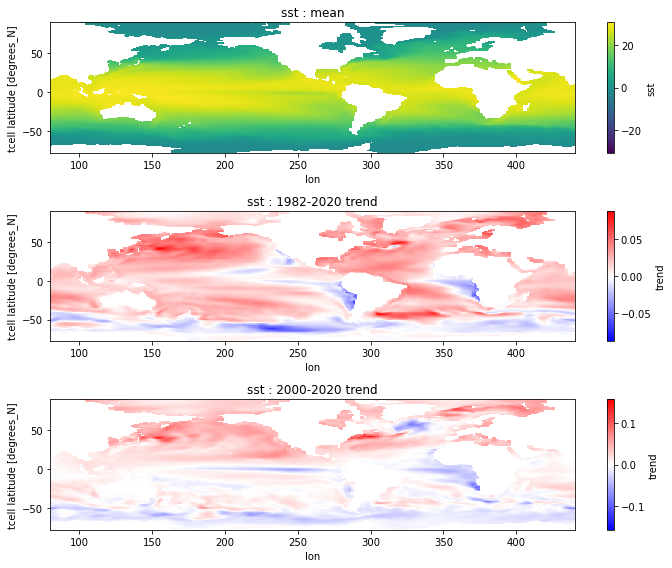

In [14]:
#Process CAFE SST for equatorial Pacific

CAFE60_eqpac_cutter(modelType='physics',
                        variable='sst',
                        cut_eqpac=False,
                        save_all_data=False,
                        trend=True,
                        force=True)

In [15]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable='stf10',
                        cut_eqpac=False,
                        save_all_data=False,
                        trend=True,
                        plot=False,
                        force=True)

Starting on Variable: stf10
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.196992 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saved to: /scratch1/pit071/CAFE60/processed/global/stf10_ensmean_1982.nc
Saved to: /scratch1/pit071/CAFE60/processed/global/stf10_ensstd_1982.nc


In [13]:
CAFE60_eqpac_cutter(modelType='BGC',
                        variable=['stf10','pprod_gross_2d','export_prod','surface_zoo','surface_dic'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        plot=False,
                        force=True)

Starting on Variable: stf10
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.03038784 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


Saved to: /scratch1/pit071/CAFE60/processed/eqpac/stf10_ensmean_1982.nc
Saved to: /scratch1/pit071/CAFE60/processed/eqpac/stf10_ensstd_1982.nc
Starting on Variable: pprod_gross_2d
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.03038784 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensmean_1982.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/eqpac/pprod_gross_2d_ensstd_1982.nc
Starting on Variable: export_prod
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.03038784 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/eqpac/export_prod_ensmean_1982.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Saved to: /scratch1/pit071/CAFE60/processed/eqpac/export_prod_ensstd_1982.nc
Starting on Variable: surface_zoo
Begin Dataset Size: 29.85984 GB
renamed lons
Saving Mean Ens Dataset Size: 0.03038784 GB


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

In [9]:
d1=xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/ocean_bgc_month.zarr/',consolidated=True)

In [10]:
d1

<xarray.Dataset>
Dimensions:          (ensemble: 96, scalar_axis: 1, st_ocean: 50, time: 720, xt_ocean: 360, yt_ocean: 300)
Coordinates:
  * ensemble         (ensemble) int32 1 2 3 4 5 6 7 8 ... 90 91 92 93 94 95 96
  * scalar_axis      (scalar_axis) float64 0.0
  * st_ocean         (st_ocean) float64 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * time             (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
  * xt_ocean         (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean         (yt_ocean) float64 -77.88 -77.63 -77.38 ... 89.32 89.77
Data variables: (12/33)
    adic             (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    alk              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3            (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    caco3_sediment   (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    det              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
    det_sediment     (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    ...               ...
    surface_o2       (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_phy      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    surface_zoo      (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 300, 360), meta=np.ndarray>
    total_aco2_flux  (time, ensemble, scalar_axis) float32 dask.array<chunksize=(1, 96, 1), meta=np.ndarray>
    total_co2_flux   (time, ensemble, scalar_axis) float32 dask.array<chunksize=(1, 96, 1), meta=np.ndarray>
    zoo              (time, ensemble, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 3, 300, 360), meta=np.ndarray>
Attributes: (12/24)
    calendar:                 julian
    cm-enkf_source:          commit 0141830a243704acbf6d8c8c843b161a39ec39fa
    contact_name:            Decadal Activity 1 - Data Assimilation
    control_name:            c5
    creation_date:           Sun Dec  1 23:38:56 2019
    data_assimilation_name:  d60
    ...                      ...
    model_source:            commit 2abb29f4384e68777721fa657850587f28efd85a
    nominal_resoltuion:      Atmosphere delta lat = 2.02degrees ; Atmosphere ...
    perturbation_name:       not applicable
    references:              OKane, T.J., Sandery, P.A., Monselesan, D.P., Sa...
    run_variant_name:        data assimilation
    title:                   AccessOcean-AM2

In [5]:
d=xr.open_zarr('/OSM/CBR/OA_DCFP/data/model_output/CAFE/data_assimilation/d60-zarr/atmos_isobaric_month.zarr/',consolidated=True)

In [12]:
d

<xarray.Dataset>
Dimensions:         (ensemble: 96, level: 21, time: 720, xt_ocean: 144, yt_ocean: 90)
Coordinates:
  * ensemble        (ensemble) int32 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * yt_ocean        (yt_ocean) float64 -89.49 -87.98 -85.96 ... 87.98 89.49
  * level           (level) float32 1.0 5.0 10.0 20.0 ... 850.0 925.0 1e+03
  * xt_ocean        (xt_ocean) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time            (time) object 1960-01-16 12:00:00 ... 2019-12-16 12:00:00
Data variables: (12/37)
    DELP            (time, ensemble, level, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    ...              ...
    u_ref           (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    ucomp           (time, ensemble, level, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    v_ref           (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    vcomp           (time, ensemble, level, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 21, 90, 144), meta=np.ndarray>
    vis_exopd_vl_c  (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
    wvp             (time, ensemble, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 96, 90, 144), meta=np.ndarray>
Attributes: (12/27)
    NCO:                        netCDF Operators version 4.7.8 (Homepage = ht...
    calendar:                    julian
    cm-enkf_source:             commit 0141830a243704acbf6d8c8c843b161a39ec39fa
    comment:                    pressure level interpolator, version 3.0, pre...
    contact_name:               Decadal Activity 1 - Data Assimilation
    control_name:               c5
    ...                         ...
    model_source:               commit 2abb29f4384e68777721fa657850587f28efd85a
    nominal_resoltuion:         Atmosphere delta lat = 2.02degrees ; Atmosphe...
    perturbation_name:          not applicable
    references:                 OKane, T.J., Sandery, P.A., Monselesan, D.P.,...
    run_variant_name:           data assimilation
    title:                      AccessOcean-AM2

Starting on Variable: u_ref
Begin Dataset Size: 3.5831808 GB
vars probably already named
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/u_ref_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/u_ref_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/u_ref_meantrends_2000.nc


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


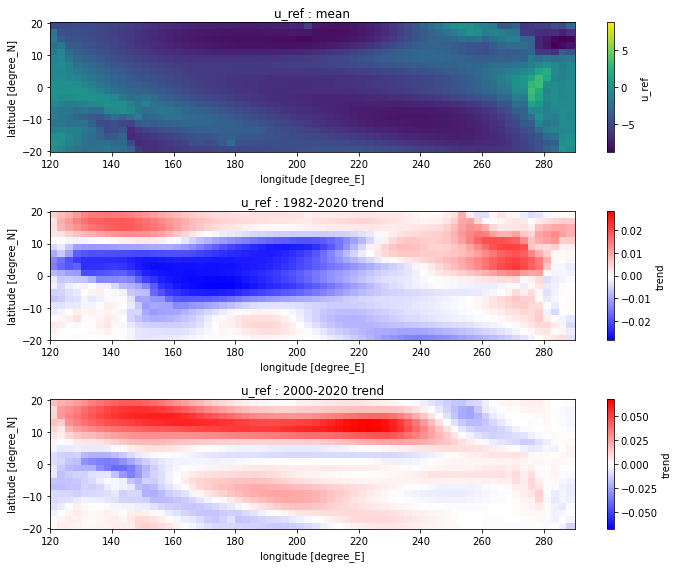

Starting on Variable: v_ref
Begin Dataset Size: 3.5831808 GB
vars probably already named
Mean Ens Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/v_ref_ensmean_1982.nc
1982 trend Dataset already exists /scratch1/pit071/CAFE60/processed/eqpac/v_ref_meantrends_1982.nc
2000 trend Dataset already exists: /scratch1/pit071/CAFE60/processed/eqpac/v_ref_meantrends_2000.nc


/home/pit071/CAFE60_eqpac/model_cutting_functions.py:257: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  modeldata['time']=np.array(modeldata.indexes['time'].to_datetimeindex(), dtype='datetime64[M]')


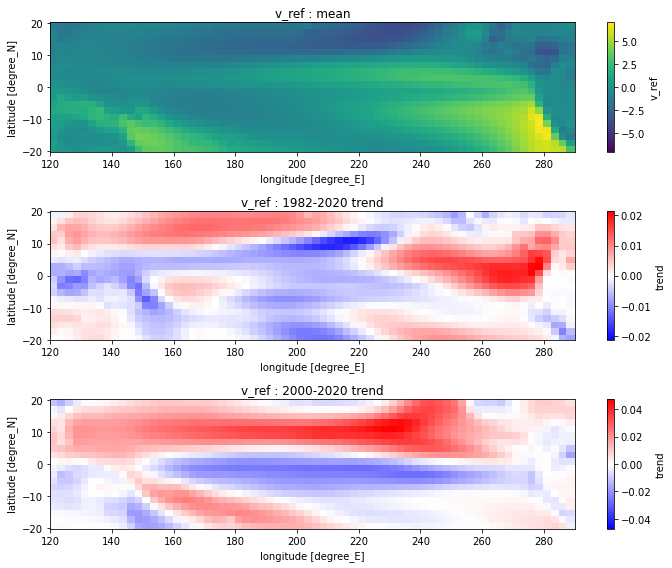

In [51]:
CAFE60_eqpac_cutter(modelType='atmos',
                        variable=['u_ref','v_ref'],
                        cut_eqpac=True,
                        save_all_data=False,
                        trend=True,
                        fix_long_coords=False,
                        plot=True,
                        force=False)

In [55]:
u=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/u_ref_ensmean_1982.nc')
v=xr.open_dataset('/scratch1/pit071/CAFE60/processed/eqpac/v_ref_ensmean_1982.nc')
ws=np.sqrt((u.u_ref**2)+(v.v_ref**2))
ws.to_netcdf('/scratch1/pit071/CAFE60/processed/eqpac/ws_ensmean_1982.nc')


In [3]:
#Cut out global and eqpac reynolds SST and calculate trends for them. Saved in /scratch1/pit071/CAFE60/processed/obs/
cut_regrid_reynolds_sst(True,True) #Cut eqpac SST,force (If force=True will delete any existing file and resave)
cut_regrid_reynolds_sst(False,True) #Cut global SST and force save 
cut_process_sst_obs_trends(True) #Force trends for both global and eqpac. Should do both eqpac and global.  

Reuse existing file: bilinear_180x170_300x360.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


saving: /scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.eqpac.nc
Reuse existing file: bilinear_180x360_300x360.nc


/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/datastore/pit071/miniconda3/envs/pangeo/lib/python3.8/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


saving: /scratch1/pit071/CAFE60/processed/obs/sst.mnmean.regrid.global.nc
saving 82 sst trends
saving 2000 sst trends
saving 82 sst trends
saving 2000 sst trends


In [6]:
#Basically the same as above but for landshutzer.
#proc_landschutzer(False,True) 
proc_landschutzer(True,True,True)
process_co2_land_trends(True)

Reuse existing file: bilinear_180x360_300x360.nc


In [25]:
proc_landschutzer(False,True,True) #Do old landshutzer as well